<div style="background-color: lightblue;border: 1px solid black; padding: 10px">

### Project by:
    
**Meghavi Singhaniya (ms89872)**  
**Vaibhav Nagar**  
**Pratyush Sharma**  
**Shrishti**  
**Mayank Gupta**
</div>

<div style="background-color: lightgray; padding: 10px;">
    
**Mood based recommender**
    
</div>

# Data Preparation

In [ ]:
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm
import os

# convert string to integer
def atoi(s):
    n = 0
    for i in s:
        n = n*10 + ord(i) - ord("0")
    return n

# making folders
outer_names = ['test','train', 'val']
# original = ['angry', 'disgusted', 'fearful', 'happy', 'sad', 'surprised', 'neutral']
inner_names = ['angry', 'happy', 'sad', 'calm']
os.makedirs('data', exist_ok=True)
for outer_name in outer_names:
    os.makedirs(os.path.join('data',outer_name), exist_ok=True)
    for inner_name in inner_names:
        os.makedirs(os.path.join('data',outer_name,inner_name), exist_ok=True)

# to keep count of each category
angry = 0
happy = 0
sad = 0
calm = 0
angry_val = 0
happy_val = 0
sad_val = 0
calm_val = 0
angry_test = 0
happy_test = 0
sad_test = 0
calm_test = 0

df = pd.read_csv('/content/fer_updated_2.csv')
mat = np.zeros((48,48),dtype=np.uint8)

In [ ]:
df['Usage'].value_counts()

Training       21005
PublicTest      2622
PrivateTest     2590
Name: Usage, dtype: int64

In [ ]:
# delete folder in colab
# %rm -rf data

In [ ]:
# angry,happy,sad,calm,angry_test,happy_test,sad_test,calm_test

In [ ]:
# read the csv file line by line
for i in tqdm(range(len(df))):
    txt = df['pixels'][i]
    words = txt.split()

    # the image size is 48x48
    for j in range(2304):
        xind = j // 48
        yind = j % 48
        mat[xind][yind] = atoi(words[j])

    img = Image.fromarray(mat)

    # train
    if i < 21005: #28709 full dataset
        if df['emotion'][i] == 0:
            img.save('/content/data/train/angry/im'+str(angry)+'.png')
            angry += 1
        # elif df['emotion'][i] == 1:
        #     img.save('train/disgusted/im'+str(disgusted)+'.png')
        #     disgusted += 1
        # elif df['emotion'][i] == 2:
        #     img.save('train/fearful/im'+str(fearful)+'.png')
        #     fearful += 1
        elif df['emotion'][i] == 1:
            img.save('/content/data/train/happy/im'+str(happy)+'.png')
            happy += 1
        elif df['emotion'][i] == 2:
            img.save('/content/data/train/sad/im'+str(sad)+'.png')
            sad += 1
        # elif df['emotion'][i] == 5:
        #     img.save('train/surprised/im'+str(surprised)+'.png')
        #     surprised += 1
        elif df['emotion'][i] == 3:
            img.save('/content/data/train/calm/im'+str(calm)+'.png')
            calm += 1
    # val
    elif i>21005 and i<23627:
      if df['emotion'][i] == 0:
        img.save('/content/data/val/angry/im'+str(angry_val)+'.png')
        angry_val += 1
      elif df['emotion'][i] == 1:
        img.save('/content/data/val/happy/im'+str(happy_val)+'.png')
        happy_val += 1
      elif df['emotion'][i] == 2:
        img.save('/content/data/val/sad/im'+str(sad_val)+'.png')
        sad_val += 1
      elif df['emotion'][i] == 3:
        img.save('/content/data/val/calm/im'+str(calm_val)+'.png')
        calm_val += 1

    # test
    else:
        if df['emotion'][i] == 0:
            img.save('/content/data/test/angry/im'+str(angry_test)+'.png')
            angry_test += 1
        # elif df['emotion'][i] == 1:
        #     img.save('test/disgusted/im'+str(disgusted_test)+'.png')
        #     disgusted_test += 1
        # elif df['emotion'][i] == 2:
        #     img.save('test/fearful/im'+str(fearful_test)+'.png')
        #     fearful_test += 1
        elif df['emotion'][i] == 1:
            img.save('/content/data/test/happy/im'+str(happy_test)+'.png')
            happy_test += 1
        elif df['emotion'][i] == 2:
            img.save('/content/data/test/sad/im'+str(sad_test)+'.png')
            sad_test += 1
        # elif df['emotion'][i] == 5:
        #     img.save('test/surprised/im'+str(surprised_test)+'.png')
        #     surprised_test += 1
        elif df['emotion'][i] == 3:
            img.save('/content/data/test/calm/im'+str(calm_test)+'.png')
            calm_test += 1

print("Done!")

100%|██████████| 26217/26217 [01:35<00:00, 273.52it/s]

Done!


# EDA

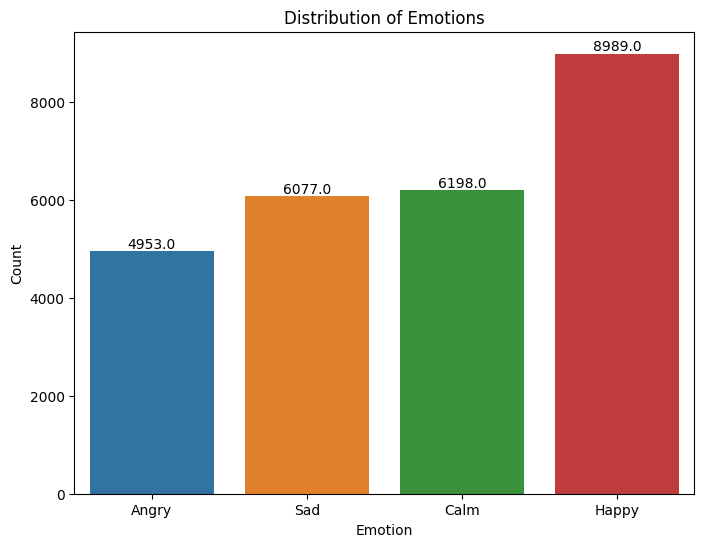

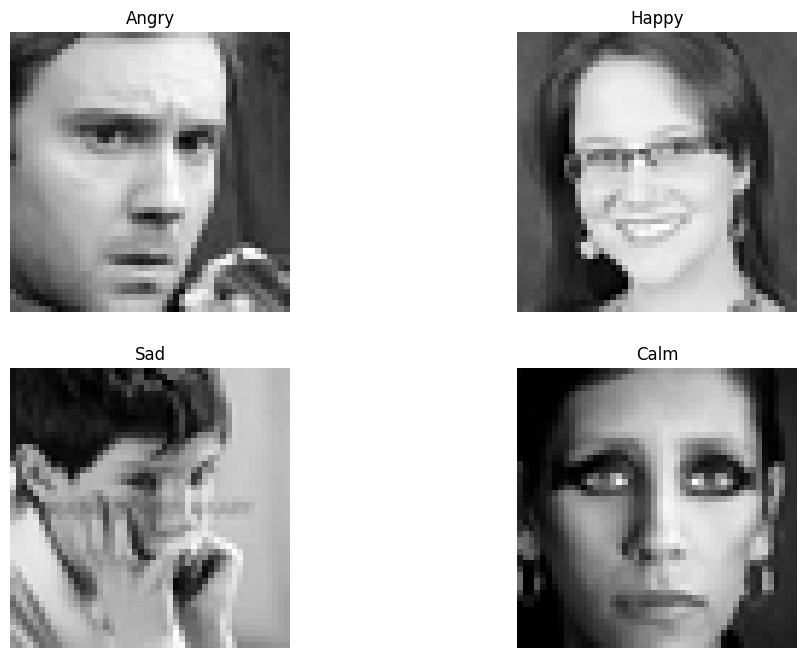

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# # Load the DataFrame
# df = pd.read_csv('/content/fer_updated_2.csv')

# # Distribution of Emotions
# plt.figure(figsize=(8, 6))
# sns.countplot(x='emotion', data=df)
# plt.title('Distribution of Emotions')
# plt.xlabel('Emotion')
# plt.ylabel('Count')
# plt.show()

# # Sample Images for each Emotion
# emotion_mapping = {0: 'Angry', 1: 'Happy', 2: 'Sad', 3: 'Calm'}
# plt.figure(figsize=(12, 8))
# for i in range(4):
#     plt.subplot(2, 2, i + 1)
#     sample_image = df[df['emotion'] == i]['pixels'].iloc[0].split()
#     sample_image = np.array(sample_image, dtype=np.uint8).reshape((48, 48))
#     plt.imshow(sample_image, cmap='gray')
#     plt.title(emotion_mapping[i])
#     plt.axis('off')
# plt.show()

# Mapping numeric labels to emotion labels
emotion_mapping = {0: 'Angry', 1: 'Happy', 2: 'Sad', 3: 'Calm'}
df['emotion_label'] = df['emotion'].map(emotion_mapping)

# Distribution of Emotions
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='emotion_label', data=df)
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Sample Images for each Emotion
plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    sample_image = df[df['emotion'] == i]['pixels'].iloc[0].split()
    sample_image = np.array(sample_image, dtype=np.uint8).reshape((48, 48))
    plt.imshow(sample_image, cmap='gray')
    plt.title(emotion_mapping[i])
    plt.axis('off')
plt.show()

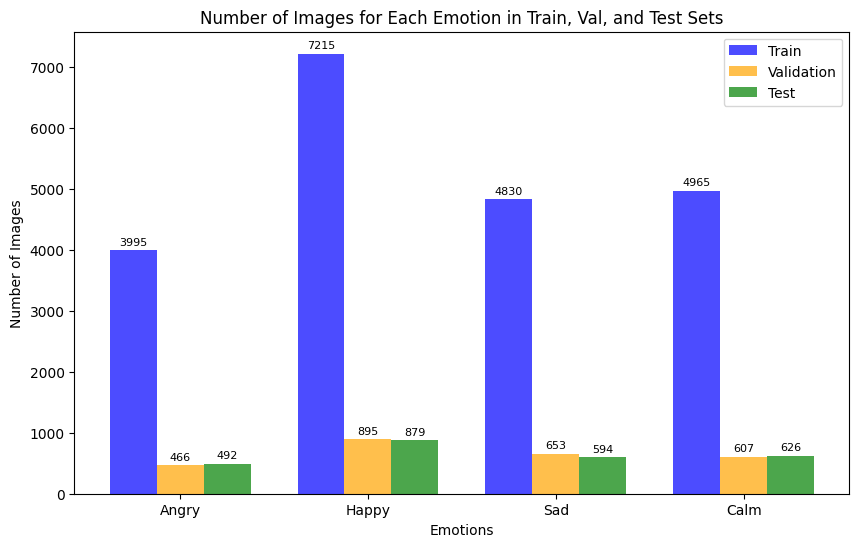

In [ ]:
import matplotlib.pyplot as plt

# Count the number of images for each emotion in train, val, and test sets
train_counts = [angry, happy, sad, calm]
val_counts = [angry_val, happy_val, sad_val, calm_val]
test_counts = [angry_test, happy_test, sad_test, calm_test]

emotions = ['Angry', 'Happy', 'Sad', 'Calm']

# Plotting the bar graph
bar_width = 0.25
index = range(len(emotions))

plt.figure(figsize=(10, 6))
bars_train = plt.bar(index, train_counts, width=bar_width, label='Train', color='blue', alpha=0.7)
bars_val = plt.bar([i + bar_width for i in index], val_counts, width=bar_width, label='Validation', color='orange', alpha=0.7)
bars_test = plt.bar([i + 2 * bar_width for i in index], test_counts, width=bar_width, label='Test', color='green', alpha=0.7)

plt.xlabel('Emotions')
plt.ylabel('Number of Images')
plt.title('Number of Images for Each Emotion in Train, Val, and Test Sets')
plt.xticks([i + bar_width for i in index], emotions)
plt.legend()

# Add labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 50, round(yval), ha='center', va='bottom', fontsize=8)

add_labels(bars_train)
add_labels(bars_val)
add_labels(bars_test)

plt.show()

# Model Training

In [ ]:
import numpy as np
import argparse
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
# # command line argument
# ap = argparse.ArgumentParser()
# ap.add_argument("--mode",help="train/display")
# mode = ap.parse_args().mode

In [ ]:
# plots accuracy and loss curves
def plot_model_history(model_history):

    'Plot Accuracy and Loss curves with the model_history'

    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1,len(model_history.history['accuracy'])/10))
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1,len(model_history.history['loss'])/10))
    axs[1].legend(['train', 'val'], loc='best')
    fig.savefig('plot.png')
    plt.show()

In [ ]:
# Define data generators
train_dir = '/content/data/train'
val_dir = '/content/data/val'
test_dir = '/content/data/test'

num_train = 21005
num_val = 2622
batch_size = 64
num_epoch = 50

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

# Create the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))


# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])
model_info = model.fit_generator(
        train_generator,
        steps_per_epoch=num_train // batch_size,
        epochs=num_epoch,
        validation_data=validation_generator,
        validation_steps=num_val // batch_size)

Found 21005 images belonging to 4 classes.
Found 2621 images belonging to 4 classes.
Found 2591 images belonging to 4 classes.


Epoch 1/50


<ipython-input-20-ab477c7bd245>:60: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_info = model.fit_generator(


328/328 [==============================] - 26s 41ms/step - loss: 1.3476 - accuracy: 0.3518 - val_loss: 1.2916 - val_accuracy: 0.4160
Epoch 2/50
328/328 [==============================] - 13s 40ms/step - loss: 1.1819 - accuracy: 0.4731 - val_loss: 1.0448 - val_accuracy: 0.5379
Epoch 3/50
328/328 [==============================] - 13s 39ms/step - loss: 1.0287 - accuracy: 0.5600 - val_loss: 0.9567 - val_accuracy: 0.5918
Epoch 4/50
328/328 [==============================] - 13s 39ms/step - loss: 0.9589 - accuracy: 0.5886 - val_loss: 0.9144 - val_accuracy: 0.6090
Epoch 5/50
328/328 [==============================] - 13s 39ms/step - loss: 0.9043 - accuracy: 0.6216 - val_loss: 0.8903 - val_accuracy: 0.6238
Epoch 6/50
328/328 [==============================] - 13s 39ms/step - loss: 0.8713 - accuracy: 0.6340 - val_loss: 0.8566 - val_accuracy: 0.6328
Epoch 7/50
328/328 [==============================] - 13s 38ms/step - loss: 0.8434 - accuracy: 0.6510 - val_loss: 0.8619 - val_accuracy: 0.6293
Epo

In [ ]:
# Evaluate the model on the test dataset
eval_result = model.evaluate_generator(test_generator, steps=len(test_generator))

# Print the evaluation result
print("Test Loss:", eval_result[0])
print("Test Accuracy:", eval_result[1])

<ipython-input-21-545f0cdef440>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  eval_result = model.evaluate_generator(test_generator, steps=len(test_generator))


Test Loss: 0.9173063635826111
Test Accuracy: 0.6947124600410461


In [ ]:
model.save_weights('model_weights_training.h5')
model.save('model_new_training.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


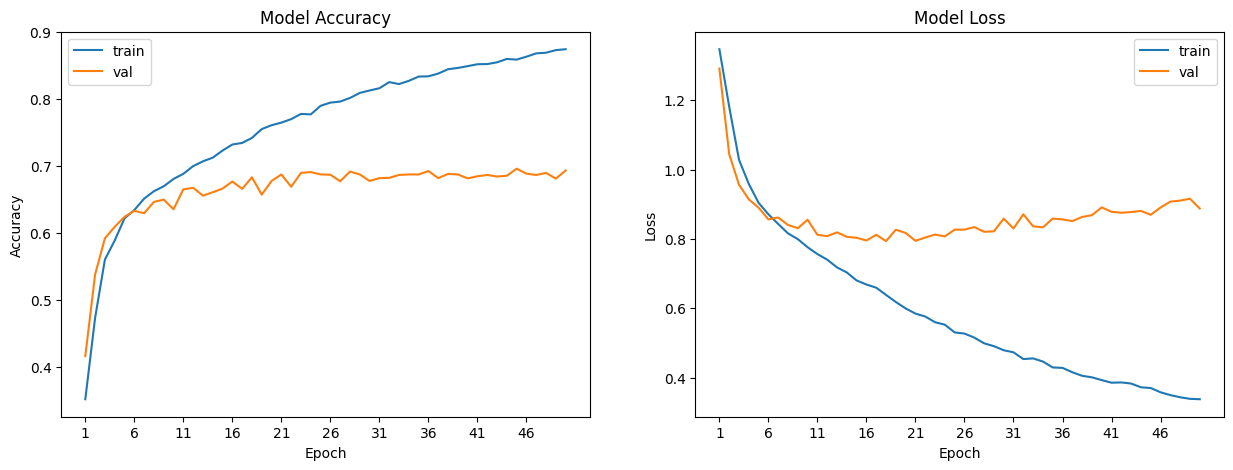

In [ ]:
plot_model_history(model_info)

In [ ]:
model_history_df = pd.DataFrame(model_info.history)
model_history_df

,loss,accuracy,val_loss,val_accuracy
0,1.347575,0.351750,1.291634,0.416016
1,1.181941,0.473139,1.044803,0.537891
2,1.028731,0.560050,0.956741,0.591797
3,0.958862,0.588606,0.914436,0.608984
4,0.904301,0.621556,0.890265,0.623828
5,0.871312,0.633972,0.856625,0.632812
6,0.843385,0.650972,0.861902,0.629297
7,0.816157,0.662098,0.840568,0.646094
8,0.799603,0.669405,0.831118,0.649609
9,0.776228,0.680436,0.855562,0.635156


In [ ]:
# model_history_df.to_csv('model_history.csv')

In [ ]:
index_where_equal = (model_history_df['loss'] - model_history_df['val_loss']).abs().idxmin()
index_where_min = model_history_df['val_loss'].idxmin()
index_where_equal, index_where_min

(4, 17)

Least Validataion Loss is observed after 17 epochs, hence we retrain the model for 18 epochs.

In [ ]:
# Define data generators
train_dir = '/content/data/train'
val_dir = '/content/data/val'
test_dir = '/content/data/test'

num_train = 21005
num_val = 2622
batch_size = 64
num_epoch = 18

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

# Create the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))


# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])
model_info = model.fit_generator(
        train_generator,
        steps_per_epoch=num_train // batch_size,
        epochs=num_epoch,
        validation_data=validation_generator,
        validation_steps=num_val // batch_size)

Found 21005 images belonging to 4 classes.
Found 2621 images belonging to 4 classes.
Found 2591 images belonging to 4 classes.


Epoch 1/18


<ipython-input-28-5d7cbbf6abc8>:60: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_info = model.fit_generator(


328/328 [==============================] - 15s 41ms/step - loss: 1.3412 - accuracy: 0.3600 - val_loss: 1.1997 - val_accuracy: 0.4844
Epoch 2/18
328/328 [==============================] - 13s 40ms/step - loss: 1.1018 - accuracy: 0.5122 - val_loss: 0.9909 - val_accuracy: 0.5699
Epoch 3/18
328/328 [==============================] - 14s 42ms/step - loss: 0.9853 - accuracy: 0.5760 - val_loss: 0.9533 - val_accuracy: 0.6004
Epoch 4/18
328/328 [==============================] - 13s 39ms/step - loss: 0.9262 - accuracy: 0.6081 - val_loss: 0.9016 - val_accuracy: 0.6187
Epoch 5/18
328/328 [==============================] - 13s 41ms/step - loss: 0.8868 - accuracy: 0.6271 - val_loss: 0.8869 - val_accuracy: 0.6027
Epoch 6/18
328/328 [==============================] - 12s 36ms/step - loss: 0.8501 - accuracy: 0.6433 - val_loss: 0.8511 - val_accuracy: 0.6367
Epoch 7/18
328/328 [==============================] - 13s 39ms/step - loss: 0.8149 - accuracy: 0.6620 - val_loss: 0.8571 - val_accuracy: 0.6465
Epo

In [ ]:
# Evaluate the model on the test dataset
eval_result = model.evaluate_generator(test_generator, steps=len(test_generator))

# Print the evaluation result
print("Test Loss:", eval_result[0])
print("Test Accuracy:", eval_result[1])

<ipython-input-29-545f0cdef440>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  eval_result = model.evaluate_generator(test_generator, steps=len(test_generator))


Test Loss: 0.7598645091056824
Test Accuracy: 0.702817440032959


In [ ]:
model.save_weights('model_weights_training_optimal.h5')
model.save('model_new_training_optimal.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


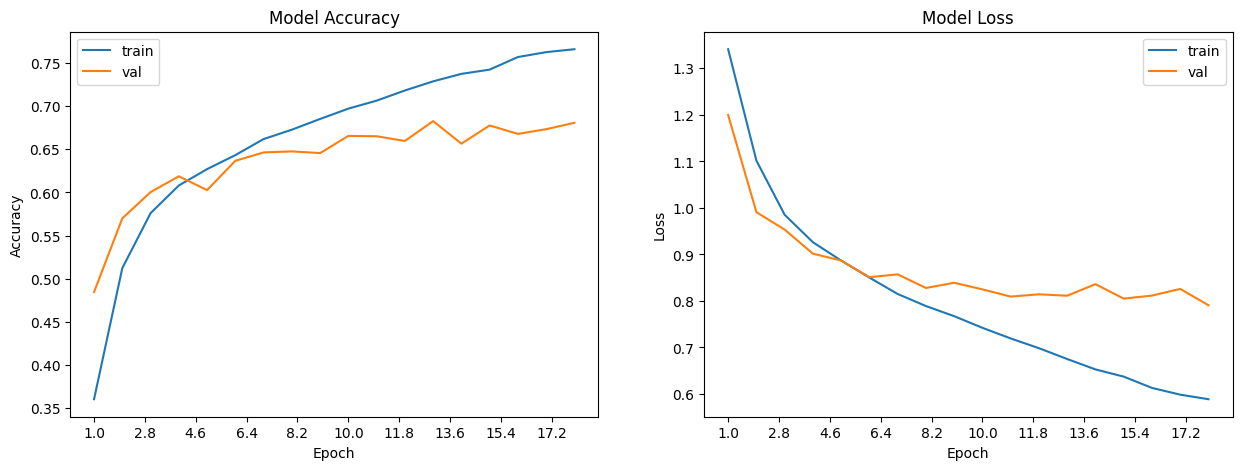

In [ ]:
plot_model_history(model_info)

### Confusion Matrix

<ipython-input-32-5f62ecd2a177>:8: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_generator).argmax(axis=1)


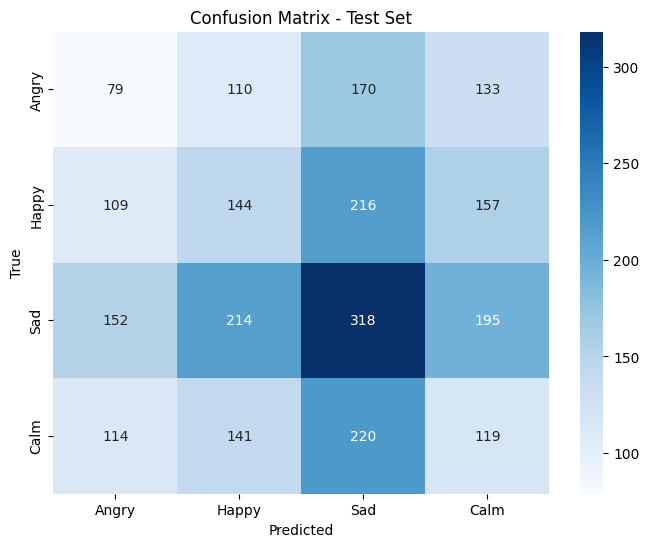


Classification Report:
               precision    recall  f1-score   support

       Angry       0.17      0.16      0.17       492
       Happy       0.24      0.23      0.23       626
         Sad       0.34      0.36      0.35       879
        Calm       0.20      0.20      0.20       594

    accuracy                           0.25      2591
   macro avg       0.24      0.24      0.24      2591
weighted avg       0.25      0.25      0.25      2591



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# ... (your existing code)

# Evaluate the model on the test dataset
y_true = test_generator.classes
y_pred = model.predict_generator(test_generator).argmax(axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotions, yticklabels=emotions)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print classification report
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=emotions))

# Emotion Prediction

In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow
import argparse
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# mode = "display"

# Create the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))


def emotion_recog(frame):
    model.load_weights('model_weights_training_optimal.h5')

    # prevents openCL usage and unnecessary logging messages
    cv2.ocl.setUseOpenCL(False)

    # dictionary which assigns each label an emotion (alphabetical order)
    emotion_dict = {0: "Angry", 1:"Happy", 2:"Sad", 3: "Calm"}

    # frame = cv2.imread("image1.jpg")
    # facecasc = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') # for jupyter
    facecasc = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml') # for colab
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 255), 3)
        roi_gray = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
        prediction = model.predict(cropped_img)
        maxindex = int(np.argmax(prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    # cv2_imshow(frame)
    return frame


1/1 [==============================] - 0s 101ms/step


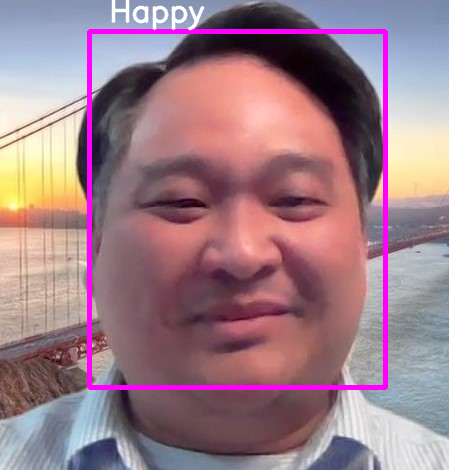

In [ ]:
input = cv2.imread("happy.jpg")
output = emotion_recog(input)
cv2_imshow(output)

1/1 [==============================] - 0s 92ms/step


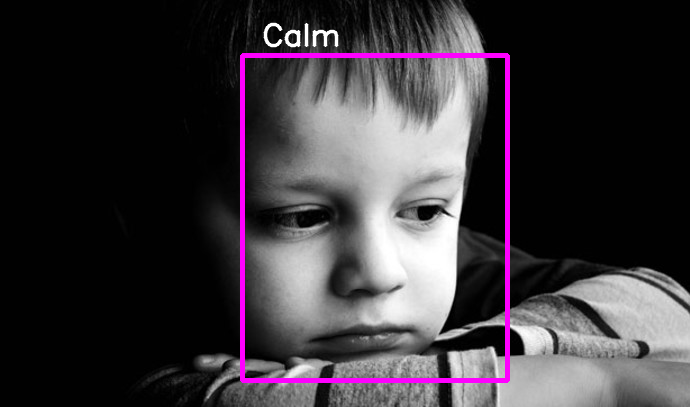

In [ ]:
input = cv2.imread("calm.jpeg")
output = emotion_recog(input)
cv2_imshow(output)

# Real time mood detection



## Colab code

In [ ]:
# Run only if using colab
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
# Run on only if using colab
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

1/1 [==============================] - 0s 22ms/step


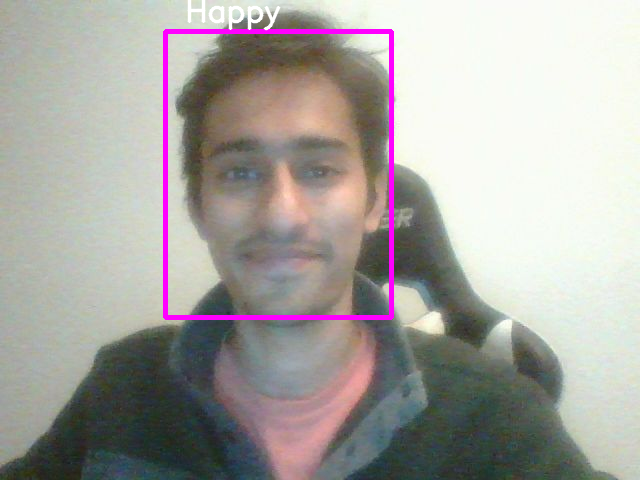

In [ ]:
input = cv2.imread("photo.jpg")
output = emotion_recog(input)
cv2_imshow(output)

## Jupyter Notebook Code

In [1]:
import cv2
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
frame_height, frame_width, _ = frame.shape
out = cv2.VideoWriter('output.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))
print("Processing Video...")
while cap.isOpened():
  ret, frame = cap.read()
  if not ret:
    out.release()
    break
  output = emotion_recog(frame)
  out.write(output)
out.release()
print("Done processing video")

In [ ]:
# Alternate code

emotion_dict = {0: "Angry", 1:"Happy", 2:"Sad", 3: "Calm"}

model = load_model(MODELPATH)

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 1)
        roi_gray = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
        cv2.normalize(cropped_img, cropped_img, alpha=0, beta=1, norm_type=cv2.NORM_L2, dtype=cv2.CV_32F)
        prediction = model.predict(cropped_img)
        cv2.putText(frame, emotion_dict[int(np.argmax(prediction))], (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 1, cv2.LINE_AA)

    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()